# Wavenet Demo
Demo of our efficient generation implementation.

Trains wavenet on a single wav file. Then generates that file, starting from a single sample.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import Audio

import os
from time import time

from wavenet.utils import make_batch
from wavenet.models import Model, Generator

os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

In [2]:
# inputs, targets = make_batch('assets/voice.wav')
inputs, targets = make_batch('assets/jaekoo.wav')
num_time_samples = inputs.shape[1]
num_channels = 1
gpu_fraction = 1.0

Mono sound


In [3]:
inputs.shape, targets.shape

((1, 112054, 1), (1, 112054))

In [4]:
model = Model(num_time_samples=num_time_samples,
              num_channels=num_channels,
              gpu_fraction=gpu_fraction)

In [5]:
Audio(inputs.reshape(inputs.shape[1]), rate=44100)

0100, cost=3.43051


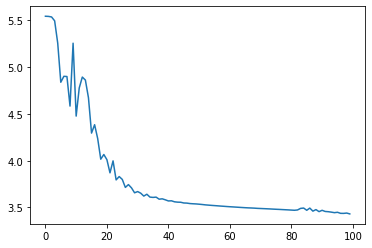

0200, cost=2.74847


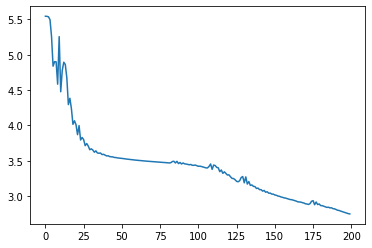

0300, cost=2.26842


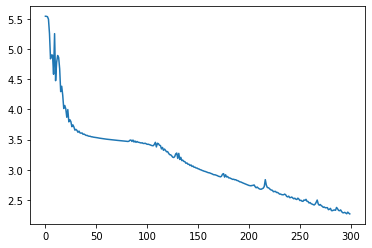

In [ ]:
tic = time()
model.train(inputs, targets)
toc = time()

print('Training took {} seconds.'.format(toc-tic))

In [ ]:
generator = Generator(model)

# Get first sample of input
input_ = inputs[:, 0:1, 0]

tic = time()
predictions = generator.run(input_, 32000)
toc = time()
print('Generating took {} seconds.'.format(toc-tic))

In [ ]:
Audio(predictions, rate=44100)